In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [267]:
df = pd.read_csv("adult_data.csv")

In [268]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [269]:
df.shape

(32561, 15)

In [270]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary']

In [271]:
#NORMALIZING THE SKEWED DISTRIBUTION USING LOG FUNCTION
def capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain']==0,np.nan,df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan,0)

In [272]:
capital_gain(df)

In [273]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


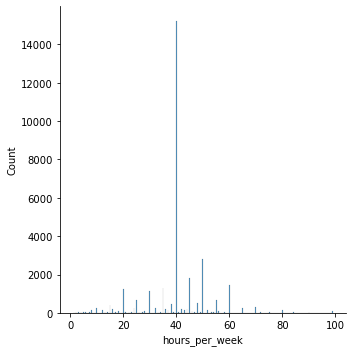

In [274]:
sns.displot(df['hours_per_week'])

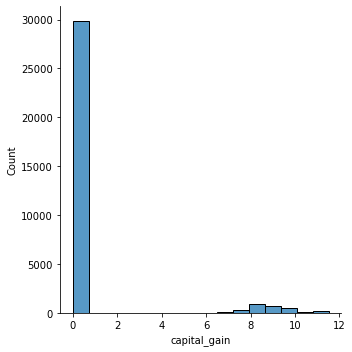

In [275]:
sns.displot(df['capital_gain'])

In [276]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [277]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [278]:
print(df['salary'].unique())

[' <=50K' ' >50K']


In [279]:
#FUNCTION TO DETECT OUTLIERS
out =[]
def outlier(col):
    mean = np.mean(col)
    std = np.std(col)
    for i in col:
        z_score = (i-mean)/std
        if np.abs(z_score)>3:
            out.append(i)
    return out

In [280]:
outlier(df['hours_per_week'])

[80,
 80,
 2,
 2,
 1,
 98,
 80,
 80,
 80,
 99,
 2,
 1,
 80,
 80,
 99,
 80,
 1,
 80,
 78,
 90,
 2,
 80,
 80,
 90,
 84,
 99,
 80,
 3,
 80,
 90,
 3,
 84,
 3,
 3,
 84,
 98,
 2,
 80,
 85,
 84,
 80,
 2,
 3,
 84,
 99,
 80,
 3,
 84,
 99,
 84,
 78,
 3,
 85,
 99,
 80,
 80,
 84,
 99,
 3,
 84,
 84,
 90,
 98,
 2,
 80,
 99,
 99,
 80,
 80,
 80,
 1,
 3,
 1,
 80,
 1,
 1,
 85,
 3,
 98,
 80,
 2,
 87,
 88,
 90,
 80,
 99,
 90,
 90,
 80,
 80,
 2,
 99,
 2,
 80,
 89,
 80,
 80,
 80,
 97,
 85,
 78,
 80,
 90,
 90,
 84,
 99,
 84,
 80,
 80,
 80,
 99,
 80,
 2,
 1,
 80,
 80,
 84,
 80,
 99,
 84,
 80,
 80,
 80,
 80,
 99,
 90,
 80,
 94,
 1,
 3,
 80,
 80,
 85,
 80,
 99,
 99,
 80,
 85,
 84,
 80,
 99,
 85,
 99,
 96,
 99,
 82,
 2,
 80,
 80,
 90,
 3,
 99,
 3,
 80,
 80,
 1,
 80,
 97,
 2,
 99,
 84,
 80,
 99,
 85,
 80,
 3,
 80,
 80,
 99,
 99,
 80,
 2,
 90,
 3,
 80,
 80,
 2,
 86,
 80,
 2,
 99,
 99,
 99,
 80,
 3,
 84,
 99,
 3,
 84,
 2,
 3,
 84,
 80,
 84,
 80,
 99,
 91,
 2,
 81,
 84,
 96,
 99,
 99,
 99,
 80,
 78,
 3,
 99,
 80,
 9

/home/kaatilkabootar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

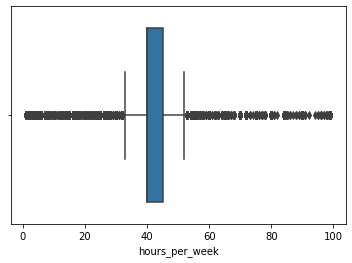

In [281]:
sns.boxplot(df['hours_per_week'])

In [282]:
#FUNCTION TO REMOVE "HOURS PER WEEK" COLUMN OUTLIER
def remove_hpw_outliers(df):
    iqr = df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)
    lower_bound = df['hours_per_week'].quantile(0.25)- (1.5*iqr)
    upper_bound = df['hours_per_week'].quantile(0.75)+ (1.5*iqr)
    
#     for i in df['hours_per_week']:
#         if i<= lower_bound:
#             i = lower_bound
#         elif i>= upper_bound:
#             i = upper_bound
    df.loc[df['hours_per_week'] <= lower_bound, 'hours_per_week'] = lower_bound
    df.loc[df['hours_per_week'] >= upper_bound, 'hours_per_week'] = upper_bound

In [283]:
remove_hpw_outliers(df)

/home/kaatilkabootar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

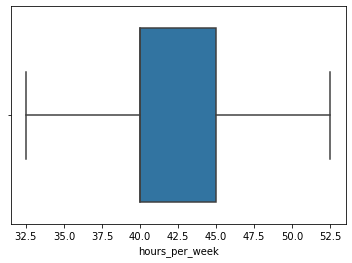

In [284]:
sns.boxplot(df['hours_per_week'])

In [285]:
#FUNCTION TO REMOVE "EDUCATION NUM" COLUMN OUTLIER
def remove_en_outliers(df):
    iqr = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    lower_bound = df['education_num'].quantile(0.25) - (1.5*iqr)
    upper_bound = df['education_num'].quantile(0.75) + (1.5 *iqr)
    
#     for i in df['education_num']:
#         if i<=lower_bound:
#             i = lower_bound
#         elif i >= upper_bound:
#             i = upper_bound
    df.loc[df['education_num'] <= lower_bound, 'education_num'] = lower_bound
    df.loc[df['education_num'] >= upper_bound, 'education_num'] = upper_bound

/home/kaatilkabootar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

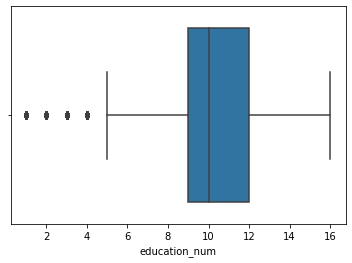

In [286]:
sns.boxplot(df['education_num'])

In [287]:
remove_en_outliers(df)

/home/kaatilkabootar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

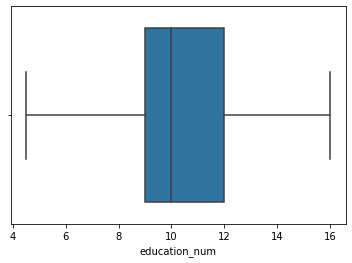

In [288]:
sns.boxplot(df['education_num'])

/home/kaatilkabootar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

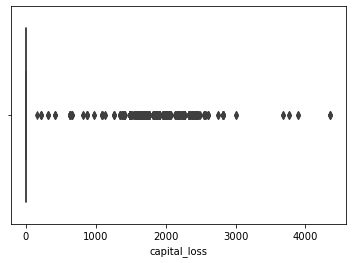

In [289]:
sns.boxplot(df['capital_loss'])

In [290]:
#FUNCTION TO REMOVE "CAPITAL LOSS" COLUMN OUTLIERS
def remove_cl_outliers(df):
    iqr = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    lower_bound = df['capital_loss'].quantile(0.25) - (1.5*iqr)
    upper_bound = df['capital_loss'].quantile(0.75) +(1.5*iqr)
    
    df.loc[df['capital_loss'] <=lower_bound,'capital_loss'] = lower_bound
    df.loc[df['capital_loss']>=upper_bound,'capital_loss'] = upper_bound

In [291]:
remove_cl_outliers(df)

/home/kaatilkabootar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

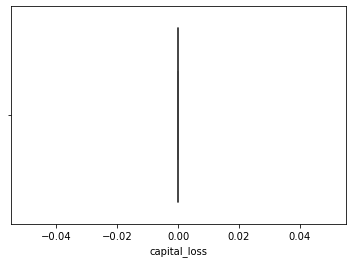

In [292]:
sns.boxplot(df['capital_loss'])

In [293]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40.0,Cuba,<=50K


In [294]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [295]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [296]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [297]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [298]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [299]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [300]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [301]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [302]:
#HERE...WHEN ENUMERATE FUNCTION IS USED, IT GIVES OUT A NUMERICAL VALUE(INDEX) ALONG WITH TEXTUAL VALUE(FIELDS) THAT IS IN df[''].unique() LIST AND GETS STORED
#IN KEY AND VALUE RESPECTIVELY. WE SAVE THE DICTIONARY SUCH THAT THE FIELDS BECOME THE KEY AND THE INDEX BECOMES THE VALUE.
#SO NOW ...WHEN WE MAP THE ELEMENTS WITH THE .map() FUNCTION, IT WILL SEARCH FOR THE COLUMN ELEMENT IN THE DECTIONARY AND REPLACES IT WITH THE INDEX VALUE THAT IS STORED.
#IN THIS WAY, EVERY CATEGORICAL VALUE GETS ASSIGNED A NUMBER.

def feature_engg(df):
    df['sex'] = np.where(df['sex']==' Male',1,0)
    
#     df['salary'] = np.where(df['salary']== ' >50K',1,0)
    
    df['workclass'] = np.where(df['workclass']== ' ?','Missing',df['workclass'])
    encoding_workclass = {value:key for key,value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(encoding_workclass)

    encoding_education = {value:key for key,value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(encoding_education)
    
    encoding_ms = {value:key for key,value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(encoding_ms)
    
    df['occupation'] = np.where(df['occupation'] ==' ?','Missing',df['occupation'])
    encoding_occupation = {value:key for key,value in enumerate(df['occupation'].unique())}
    df['occupation'] = df['occupation'].map(encoding_occupation)
    
    encoding_rel = {value:key for key,value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(encoding_rel)
    
    encoding_race = {value:key for key,value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(encoding_race)
    
    df['native_country'] = np.where(df['native_country'] == ' ?','Missing',df['native_country'])
    encoding_nc = {value:key for key,value in enumerate(df['native_country'])}
    df['native_country']  = df['native_country'].map(encoding_nc)

In [303]:
corr = df.corr()

In [304]:
df = df.drop('fnlwgt',axis=1)

In [305]:
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,32.5,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0,32.5,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552795,0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552174,0,40.0,United-States,>50K


In [306]:
feature_engg(df)

In [307]:
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,1,7.684324,0,40.0,32560,<=50K
1,50,1,0,13.0,1,1,1,0,1,0.000000,0,32.5,32560,<=50K
2,38,2,1,9.0,2,2,0,0,1,0.000000,0,40.0,32560,<=50K
3,53,2,2,7.0,1,2,1,1,1,0.000000,0,40.0,32560,<=50K
4,28,2,0,13.0,1,3,2,1,0,0.000000,0,40.0,31907,<=50K
5,37,2,3,14.0,1,1,2,0,0,0.000000,0,40.0,32560,<=50K
6,49,2,4,5.0,3,4,0,1,0,0.000000,0,32.5,32229,<=50K
7,52,1,1,9.0,1,1,1,0,1,0.000000,0,45.0,32560,>50K
8,31,2,3,14.0,0,3,0,0,0,9.552795,0,50.0,32560,>50K
9,42,2,0,13.0,1,1,1,0,1,8.552174,0,40.0,32560,>50K


In [308]:
X = df[['age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [309]:
y = df['salary']

In [310]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [311]:
X = StandardScaler().fit_transform(X)

In [312]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  ,  0.17077946],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071,  0.17077946],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  ,  0.17077946],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  ,  0.17077946],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071,  0.17077946],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  ,  0.17077946]])

In [313]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state=20)

In [314]:
print(Xtrain.shape)
print(Xtest.shape)

(22792, 13)
(9769, 13)


In [315]:
lr_model = LogisticRegression()


In [316]:
lr_model.fit(Xtrain,ytrain)

LogisticRegression()

In [317]:
ypred = lr_model.predict(Xtest)

In [318]:
result = {'Actual' : ytest ,'Predicted' : ypred}


In [319]:
pd.DataFrame(result)

,Actual,Predicted
13376,<=50K,<=50K
7676,>50K,<=50K
32188,<=50K,<=50K
30550,<=50K,<=50K
18873,>50K,<=50K
...,...,...
2097,<=50K,<=50K
15547,<=50K,<=50K
31937,<=50K,<=50K
6225,>50K,<=50K


In [320]:
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.8146176681338929
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.88      7378
        >50K       0.69      0.44      0.54      2391

    accuracy                           0.81      9769
   macro avg       0.76      0.69      0.71      9769
weighted avg       0.80      0.81      0.80      9769

